<a href="https://colab.research.google.com/github/intimanjunath/Clustering/blob/main/e_clustering__of_documents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sentence-transformers numpy pandas matplotlib scikit-learn

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [3]:
# Sample dataset of documents
documents = [
    "Artificial intelligence is transforming industries worldwide.",
    "Natural language processing enables machines to understand human language.",
    "The advancements in deep learning are revolutionizing AI research.",
    "Clustering is an unsupervised learning technique used for grouping data.",
    "Machine learning models are improving healthcare outcomes.",
    "Support vector machines are used for classification and regression tasks.",
    "Renewable energy sources are critical to combating climate change.",
    "The stock market is influenced by economic indicators and trends.",
    "Cryptocurrency adoption is growing across various industries.",
    "Solar power is an important renewable energy source for the future."
]

# Display the dataset
print("Document Dataset:")
for i, doc in enumerate(documents):
    print(f"{i + 1}: {doc}")

Document Dataset:
1: Artificial intelligence is transforming industries worldwide.
2: Natural language processing enables machines to understand human language.
3: The advancements in deep learning are revolutionizing AI research.
4: Clustering is an unsupervised learning technique used for grouping data.
5: Machine learning models are improving healthcare outcomes.
6: Support vector machines are used for classification and regression tasks.
7: Renewable energy sources are critical to combating climate change.
8: The stock market is influenced by economic indicators and trends.
9: Cryptocurrency adoption is growing across various industries.
10: Solar power is an important renewable energy source for the future.


In [4]:
# Load the SentenceTransformer model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for each document
embeddings = embedding_model.encode(documents)

# Display the shape of the embeddings
print(f"Embeddings shape: {embeddings.shape}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embeddings shape: (10, 384)


In [5]:
# Define the number of clusters
num_clusters = 3

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Display cluster assignments
print("\nCluster Assignments:")
for i, label in enumerate(cluster_labels):
    print(f"Document {i + 1}: Cluster {label}")


Cluster Assignments:
Document 1: Cluster 2
Document 2: Cluster 2
Document 3: Cluster 2
Document 4: Cluster 0
Document 5: Cluster 2
Document 6: Cluster 0
Document 7: Cluster 1
Document 8: Cluster 2
Document 9: Cluster 2
Document 10: Cluster 1


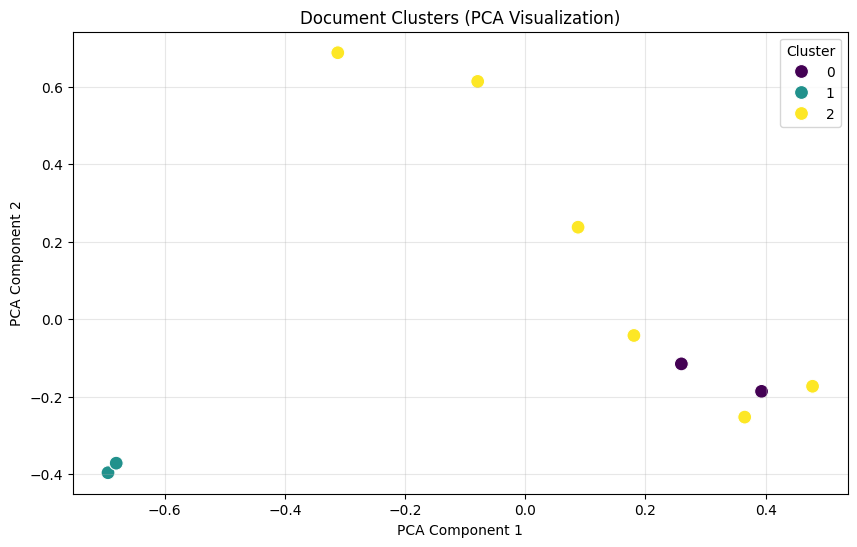

In [6]:
# Reduce embeddings dimensionality for visualization using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Create a scatter plot for the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=reduced_embeddings[:, 0],
    y=reduced_embeddings[:, 1],
    hue=cluster_labels,
    palette="viridis",
    s=100
)
plt.title("Document Clusters (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(alpha=0.3)
plt.show()

In [7]:
# Group documents by cluster
clustered_documents = pd.DataFrame({"Document": documents, "Cluster": cluster_labels})

# Print documents within each cluster
for cluster in range(num_clusters):
    print(f"\nCluster {cluster} Documents:")
    cluster_docs = clustered_documents[clustered_documents["Cluster"] == cluster]["Document"]
    for doc in cluster_docs:
        print(f"- {doc}")


Cluster 0 Documents:
- Clustering is an unsupervised learning technique used for grouping data.
- Support vector machines are used for classification and regression tasks.

Cluster 1 Documents:
- Renewable energy sources are critical to combating climate change.
- Solar power is an important renewable energy source for the future.

Cluster 2 Documents:
- Artificial intelligence is transforming industries worldwide.
- Natural language processing enables machines to understand human language.
- The advancements in deep learning are revolutionizing AI research.
- Machine learning models are improving healthcare outcomes.
- The stock market is influenced by economic indicators and trends.
- Cryptocurrency adoption is growing across various industries.


In [8]:
# Summarize each cluster (placeholder for summary logic)
# This can be replaced with LLM-based summarization using OpenAI or HuggingFace models
def summarize_cluster(documents):
    """Simple placeholder function for cluster summarization."""
    return f"Summary of {len(documents)} documents."

# Generate summaries for each cluster
print("\nCluster Summaries:")
for cluster in range(num_clusters):
    cluster_docs = clustered_documents[clustered_documents["Cluster"] == cluster]["Document"]
    summary = summarize_cluster(cluster_docs)
    print(f"Cluster {cluster} Summary: {summary}")


Cluster Summaries:
Cluster 0 Summary: Summary of 2 documents.
Cluster 1 Summary: Summary of 2 documents.
Cluster 2 Summary: Summary of 6 documents.
